# Explore Chennai hydrological data

Example based on <https://github.com/christianversloot/machine-learning-articles/blob/main/creating-an-mlp-for-regression-with-keras.md>

The data are accessible via kaggle: <https://www.kaggle.com/datasets/sudalairajkumar/chennai-water-management/versions/3>

They are composed of reservoir levels and rainfalls.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dl = pd.read_csv( 'chennai_reservoir_levels.csv', sep=',' )
dr = pd.read_csv( 'chennai_reservoir_rainfall.csv', sep=',')

print( 'Column labels are cumbersome: ', dl.columns.values.tolist() )

column_names = [ 'date', 'poon', 'chol', 'redh', 'chem' ]
dl.columns = column_names
dr.columns = column_names
print( 'They are changed to: ', dl.columns.values.tolist() )

Column labels are cumbersome:  ['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']
They are changed to:  ['date', 'poon', 'chol', 'redh', 'chem']


In [4]:
dl

date  poon  chol   redh  chem
0     01-01-2004   3.9   0.0  268.0   0.0
1     02-01-2004   3.9   0.0  268.0   0.0
2     03-01-2004   3.9   0.0  267.0   0.0
3     04-01-2004   3.9   0.0  267.0   0.0
4     05-01-2004   3.8   0.0  267.0   0.0
...          ...   ...   ...    ...   ...
5733  12-09-2019  15.0   0.0    0.0   0.0
5734  13-09-2019  15.0   0.0    0.0   0.0
5735  14-09-2019  15.0   0.0    0.0   0.0
5736  15-09-2019  15.0   0.0    0.0   0.0
5737  16-09-2019  15.0   0.0    0.0   0.0

[5738 rows x 5 columns]

## Check presence of missing values

In [5]:
dl.isna().any(), dr.isna().any()

(date    False
 poon    False
 chol    False
 redh    False
 chem    False
 dtype: bool,
 date    False
 poon    False
 chol    False
 redh    False
 chem    False
 dtype: bool)

## Shortly describe data

In [6]:
dl.describe()

poon         chol         redh         chem
count  5738.000000  5738.000000  5738.000000  5738.000000
mean   1115.562588   236.214041  1543.472891  1300.427004
std    1027.357321   274.060825   904.748504   963.682355
min       0.900000     0.000000     0.000000     0.000000
25%     198.000000    17.000000   804.250000   431.250000
50%     749.000000    90.500000  1605.500000  1207.000000
75%    1990.000000   453.750000  2223.000000  2064.750000
max    3231.000000   896.000000  3300.000000  3396.000000

In [7]:
dr.describe()

poon         chol         redh         chem
count  5738.000000  5738.000000  5738.000000  5738.000000
mean      3.376656     3.640328     3.763506     3.934132
std      12.719779    14.041697    14.981097    16.206536
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000
max     300.000000   293.000000   320.000000   475.000000

## Time series

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

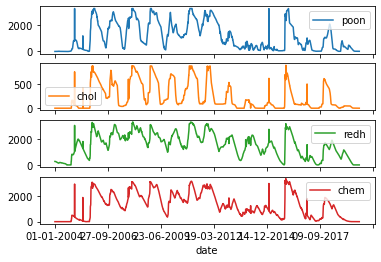

In [8]:
dl.plot('date', subplots=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

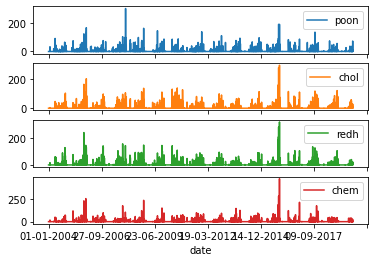

In [9]:
dr.plot('date', subplots=True)

(<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>)

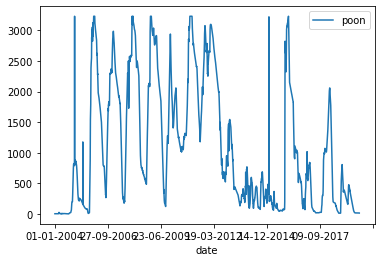

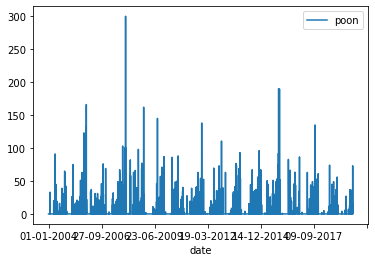

In [10]:
dl.plot('date', 'poon'), dr.plot('date', 'poon')

## Can we predict reservoir levels at 'chem' based on levels at the other sites?

* with an MLP

In [64]:
# Load dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [65]:
Ntrain = 4000

In [71]:
# Separate features and targets
Xtrain = dl.iloc[:Ntrain, 1:4].values
Ytrain = dl.iloc[:Ntrain, 4].values

In [72]:
Xtest = dl.iloc[Ntrain:, 1:4].values
Ytest = dl.iloc[Ntrain:, 4].values

In [73]:
# Set the input shape
input_shape = (3,)
print(f'Feature shape: {input_shape}')

Feature shape: (3,)


In [74]:
# Create the model
model = Sequential()
model.add(Dense(16, input_shape=input_shape, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Configure the model and start training
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(Xtrain, Ytrain, epochs=50, batch_size=1, verbose=1, validation_split=0.2)

Train on 3200 samples, validate on 800 samples
Epoch 1/100
3200/3200 [==============================] - 2s 758us/sample - loss: 222.0091 - mean_squared_error: 97751.5391 - val_loss: 496.2818 - val_mean_squared_error: 330446.9375
Epoch 2/100
3200/3200 [==============================] - 2s 684us/sample - loss: 221.4927 - mean_squared_error: 97320.9375 - val_loss: 483.7791 - val_mean_squared_error: 317907.9375
Epoch 3/100
3200/3200 [==============================] - 2s 686us/sample - loss: 218.9011 - mean_squared_error: 95559.0234 - val_loss: 494.5734 - val_mean_squared_error: 333381.5938
Epoch 4/100
3200/3200 [==============================] - 2s 682us/sample - loss: 217.6920 - mean_squared_error: 94961.8828 - val_loss: 476.5760 - val_mean_squared_error: 298241.7500
Epoch 5/100
3200/3200 [==============================] - 2s 700us/sample - loss: 215.5729 - mean_squared_error: 92974.3516 - val_loss: 486.3717 - val_mean_squared_error: 306903.7500
Epoch 6/100
3200/3200 [====================

Epoch 90/100
3200/3200 [==============================] - 2s 670us/sample - loss: 194.5087 - mean_squared_error: 82730.9375 - val_loss: 580.9901 - val_mean_squared_error: 435412.2812
Epoch 91/100
3200/3200 [==============================] - 2s 690us/sample - loss: 194.3530 - mean_squared_error: 82518.3672 - val_loss: 595.3110 - val_mean_squared_error: 454557.5312
Epoch 92/100
3200/3200 [==============================] - 2s 678us/sample - loss: 192.9431 - mean_squared_error: 81327.4375 - val_loss: 597.0321 - val_mean_squared_error: 469850.3125
Epoch 93/100
3200/3200 [==============================] - 2s 669us/sample - loss: 193.4856 - mean_squared_error: 82491.2500 - val_loss: 599.1260 - val_mean_squared_error: 449607.0938
Epoch 94/100
3200/3200 [==============================] - 2s 673us/sample - loss: 193.1739 - mean_squared_error: 81353.9688 - val_loss: 578.6724 - val_mean_squared_error: 434250.5625
Epoch 95/100
3200/3200 [==============================] - 2s 672us/sample - loss: 193

In [93]:
Yout100 = model.predict(Xtest)

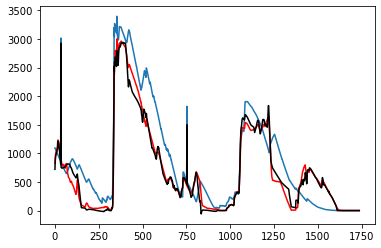

In [94]:
plt.plot(Ytest)
#plt.plot(Yout25,'r')
plt.plot(Yout100,'k')

## Work to do

* test differents numbers of epochs, validation_split...
* test differents numbers of neurons in hidden layers
* How to use information from rainfalls?